In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical as to_cat
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from seedtools import load_seed,show_all_datasets

In [2]:
data = pd.read_csv(load_seed("Social_Network_Ads.csv")).drop(columns=["User ID"])
data.Gender =  data.Gender.map({"Male":1,"Female":0})
ss =  StandardScaler()
x=  data.iloc[:,:-1]
y =  data.iloc[:,-1]
x =  ss.fit_transform(x)

x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2)

- data File ✔
- Seed file ✔
shape :  [400, 5]
columns :  ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']
desc :  DATA IS NOT YET PROVIDED


**SIMPLE MODEL**

In [3]:
model = Sequential([
    Dense(128,activation="relu",input_dim=3),
    Dense(64,activation="relu"),
    Dense(1,activation="sigmoid")
])
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["acc"])
history =  model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)



Epoch 1/10


10/10 [==============================] - 1s 19ms/step - loss: 0.6175 - acc: 0.8000 - val_loss: 0.5323 - val_acc: 0.9000
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4811 - acc: 0.8844 - val_loss: 0.4422 - val_acc: 0.8750
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3998 - acc: 0.8875 - val_loss: 0.3882 - val_acc: 0.8500
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3486 - acc: 0.8750 - val_loss: 0.3533 - val_acc: 0.8500
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3153 - acc: 0.8844 - val_loss: 0.3305 - val_acc: 0.8750
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2912 - acc: 0.9031 - val_loss: 0.3271 - val_acc: 0.8625
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2752 - acc: 0.8875 - val_loss: 0.3129 - val_acc: 0.8875
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2646 - acc:

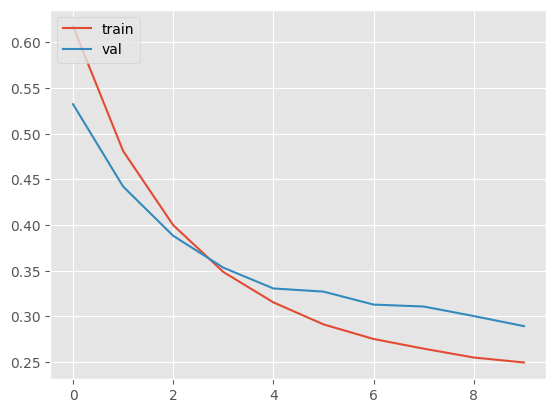

In [4]:
plt.style.use("ggplot")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["train", "val"],loc='upper left')

**DROPOUT MODEL**

In [5]:
model_drop = Sequential([
    Dense(128,activation="relu",input_dim=3),
    Dropout(0.2),
    Dense(64,activation="relu"),
    Dropout(0.2),
    Dense(1,activation="sigmoid")
])
model_drop.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["acc"])
history =  model_drop.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 22ms/step - loss: 0.6163 - acc: 0.7219 - val_loss: 0.5337 - val_acc: 0.8250
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 0.4964 - acc: 0.8344 - val_loss: 0.4502 - val_acc: 0.8250
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 0.4025 - acc: 0.8594 - val_loss: 0.4008 - val_acc: 0.8125
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 0.3580 - acc: 0.8656 - val_loss: 0.3683 - val_acc: 0.8250
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.3261 - acc: 0.8875 - val_loss: 0.3525 - val_acc: 0.8250
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 0.3128 - acc: 0.8781 - val_loss: 0.3355 - val_acc: 0.8500
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 0.2934 - acc: 0.8656 - val_loss: 0.3248 - val_acc: 0.8500
Epoch 8/10
10/10 [==============================] - 0s 6ms/step - loss: 0.2905 - acc: 0.8

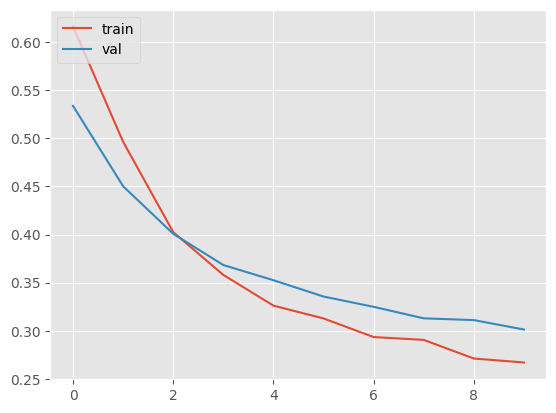

In [6]:
## Loss
plt.style.use("ggplot")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["train", "val"],loc='upper left')